In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,Input,Model
from tensorflow.keras import regularizers

In [2]:
df = pd.read_csv('zip_date_mesh.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [5]:
df['crime_count'].value_counts()

0.000000    42674
0.016174      313
0.012409      304
0.020955      274
0.032606      274
            ...  
0.129388        1
0.242603        1
0.293451        1
0.106467        1
0.228240        1
Name: crime_count, Length: 140, dtype: int64

In [6]:
42674/len(df)

0.8798037275276266

In [7]:
df['y']=0
df.loc[df['crime_count']>0,'y']=1

In [8]:
df.columns

Index(['ZIP', 'Date', 'crime_count', 'trip_count', 'Z', 'mean_pop',
       'Avg_Male_Percentage', 'Avg_Asian_NonLatinx_Percentage',
       'Avg_Black_NonLatinx_Percentage', 'Avg_White_NonLatinx_Percentage',
       'n_aff_hous', 'n_police_station', 'n_docks', 'n_clinic', 'year',
       'n_businss_license', 'n_senior_center', 'n_inspection', 'n_violation',
       'amount_sbif', 'month', 'day', 'y'],
      dtype='object')

In [9]:
df.describe()
#discrete var
fixed = ['year','month','day']
#One-Hot Binay Encoding
for i in fixed:
    if df[i].nunique()==2:
        df[i]=pd.get_dummies(df[i], drop_first=True, prefix=str(i))
    if (df[i].nunique()>2):
        df = pd.concat([df.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df[i], drop_first=True, prefix=str(i)))],axis=1)


In [10]:
from sklearn.preprocessing import scale
cont=['mean_pop',
       'Avg_Male_Percentage', 'Avg_Asian_NonLatinx_Percentage',
       'Avg_Black_NonLatinx_Percentage', 'Avg_White_NonLatinx_Percentage',
       'n_aff_hous', 'n_police_station', 'n_docks', 'n_clinic',
       'n_businss_license', 'n_senior_center', 'n_inspection', 'n_violation',
       'amount_sbif']
for i in cont:
    df[i]=scale(df[i])

In [11]:
df.columns

Index(['ZIP', 'Date', 'crime_count', 'trip_count', 'Z', 'mean_pop',
       'Avg_Male_Percentage', 'Avg_Asian_NonLatinx_Percentage',
       'Avg_Black_NonLatinx_Percentage', 'Avg_White_NonLatinx_Percentage',
       'n_aff_hous', 'n_police_station', 'n_docks', 'n_clinic',
       'n_businss_license', 'n_senior_center', 'n_inspection', 'n_violation',
       'amount_sbif', 'y', 'year_2015', 'year_2016', 'year_2017', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31'],
      dtype='object')

In [12]:
xvar = ['mean_pop',
       'Avg_Male_Percentage', 'Avg_Asian_NonLatinx_Percentage',
       'Avg_Black_NonLatinx_Percentage', 'Avg_White_NonLatinx_Percentage',
       'n_aff_hous', 'n_police_station', 'n_docks', 'n_clinic',
       'n_businss_license', 'n_senior_center', 'n_inspection', 'n_violation',
       'amount_sbif', 'year_2015', 'year_2016', 'year_2017', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31']
response_col = 'crime_count'
pvar =['Z']
df['log_share'] = np.log(df['trip_count']+1)
df[response_col]=df[response_col]*10
share_col = 'log_share'

# Benchmark

## Linear Regression without IV

In [13]:
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.regression.linear_model import OLS
endog=df[response_col]
exog=df[xvar+['log_share']]
iv = df[xvar+pvar]
linear_noiv= OLS(endog, exog, instrument=None)
linear_noiv.fit().summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['instrument']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            crime_count   R-squared (uncentered):                   0.131
Model:                            OLS   Adj. R-squared (uncentered):              0.130
Method:                 Least Squares   F-statistic:                              123.8
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                        0.00
Time:                        04:14:38   Log-Likelihood:                          43682.
No. Observations:               48504   AIC:                                 -8.725e+04
Df Residuals:                   48445   BIC:                                 -8.673e+04
Df Model:                          59                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
mean_pop                          -0.0001      0.001     -0.127      0.899      -0.002       0.002
Avg_Male_Percentage               -0.0003      0.001     -0.438      0.661      -0.002       0.001
Avg_Asian_NonLatinx_Percentage    -0.0101      0.001    -13.214      0.000      -0.012      -0.009
Avg_Black_NonLatinx_Percentage     0.0132      0.001      9.121      0.000       0.010       0.016
Avg_White_NonLatinx_Percentage    -0.0125      0.001    -10.541      0.000      -0.015      -0.010
n_aff_hous                        -0.0039      0.001     -6.523      0.000      -0.005      -0.003
n_police_station                   0.0060      0.001     10.790      0.000       0.005       0.007
n_docks                            0.0068      0.001      9.218      0.000       0.005       0.008
n_clinic                          -0.0118      0.000    -23.848      0.000      -0.013      -0.011
n_businss_license                  0.0089      0.001     10.964      0.000       0.007       0.010
n_senior_center                   -0.0062      0.001    -11.359      0.000      -0.007      -0.005
n_inspection                       0.0022      0.001      2.768      0.006       0.001       0.004
n_violation                       -0.0015      0.001     -1.856      0.064      -0.003    8.18e-05
amount_sbif                        0.0001      0.000      0.258      0.797      -0.001       0.001
year_2015                          0.0092      0.001      8.396      0.000       0.007       0.011
year_2016                          0.0144      0.001     13.007      0.000       0.012       0.017
year_2017                          0.0541      0.003     18.228      0.000       0.048       0.060
month_2                            0.0316      0.002     15.287      0.000       0.028       0.036
month_3                            0.0311      0.002     15.210      0.000       0.027       0.035
month_4                            0.0347      0.002     16.595      0.000       0.031       0.039
month_5                            0.0330      0.002     15.695      0.000       0.029       0.037
month_6                            0.0346      0.002     16.081      0.000       0.030       0.039
month_7                            0.0347      0.002     16.128      0.000       0.030       0.039
month_8                            0.0323      0.002     15.100      0.000       0.028       0.037
month_9                            0.0353      0.002     16.401      0.000       0.031       0.039
month_10                           0.0352      0.002     16.727      0.000       0.031       0.039
month_11                           0.0348      0.002     16.689      0.000       0.031       0.039
month_12      

## Linear Regression with IV

In [14]:
linear_iv= IV2SLS(endog, exog, instrument=iv)

In [15]:
linear_iv.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:            crime_count   R-squared:                      -3.695
Model:                         IV2SLS   Adj. R-squared:                 -3.701
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Sat, 16 Dec 2023                                         
Time:                        04:14:45                                         
No. Observations:               48504                                         
Df Residuals:                   48445                                         
Df Model:                          59                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
mean_pop                          -0.3091      0.126     -2.448      0.014      -0.557      -0.062
Avg_Male_Percentage               -0.0493      0.020     -2.455      0.014      -0.089      -0.010
Avg_Asian_NonLatinx_Percentage    -0.0011      0.004     -0.282      0.778      -0.009       0.007
Avg_Black_NonLatinx_Percentage    -0.1436      0.064     -2.239      0.025      -0.269      -0.018
Avg_White_NonLatinx_Percentage     0.0083      0.009      0.931      0.352      -0.009       0.026
n_aff_hous                        -0.0288      0.010     -2.807      0.005      -0.049      -0.009
n_police_station                   0.0094      0.002      4.941      0.000       0.006       0.013
n_docks                            0.0817      0.031      2.664      0.008       0.022       0.142
n_clinic                           0.0118      0.010      1.217      0.224      -0.007       0.031
n_businss_license                  0.0903      0.033      2.710      0.007       0.025       0.156
n_senior_center                    0.0332      0.016      2.055      0.040       0.002       0.065
n_inspection                       0.0062      0.002      2.511      0.012       0.001       0.011
n_violation                       -0.0014      0.002     -0.759      0.448      -0.005       0.002
amount_sbif                     5.333e-05      0.001      0.051      0.959      -0.002       0.002
year_2015                          0.0697      0.025      2.806      0.005       0.021       0.118
year_2016                          0.0972      0.034      2.865      0.004       0.031       0.164
year_2017                          0.1976      0.059      3.348      0.001       0.082       0.313
month_2                            0.0788      0.020      3.964      0.000       0.040       0.118
month_3                            0.1499      0.049      3.075      0.002       0.054       0.245
month_4                            0.2191      0.076      2.902      0.004       0.071       0.367
month_5                            0.2849      0.103      2.765      0.006       0.083       0.487
month_6                            0.3373      0.124      2.725      0.006       0.095       0.580
month_7                            0.3595      0.133      2.707      0.007       0.099       0.620
month_8                            0.3478      0.129      2.697      0.007       0.095       0.601
month_9                            0.3332      0.122      2.735      0.006       0.094       0.572
month_10                           0.2875      0.103      2.786      0.005       0.085       0.490
month_11                           0.2101      0.072      2.927      0.003       0.069       0.351
month_12                           0.1376      0.042      3.257      0.001       0.055       0.220
day_2         

## Logistic Regression without IV

In [24]:
import statsmodels.api as sm
logistic_noiv = sm.Logit(endog, exog).fit()
logistic_noiv.summary()

Optimization terminated successfully.
         Current function value: 0.307784
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48504
Model:                          Logit   Df Residuals:                    48445
Method:                           MLE   Df Model:                           58
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.1621
Time:                        01:00:38   Log-Likelihood:                -14929.
converged:                       True   LL-Null:                       -17816.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
mean_pop                           0.2799      0.037      7.586      0.000       0.208       0.352
Avg_Male_Percentage               -0.2377      0.031     -7.652      0.000      -0.299      -0.177
Avg_Asian_NonLatinx_Percentage    -0.6797      0.039    -17.495      0.000      -0.756      -0.604
Avg_Black_NonLatinx_Percentage     0.2770      0.045      6.095      0.000       0.188       0.366
Avg_White_NonLatinx_Percentage    -0.1629      0.036     -4.575      0.000      -0.233      -0.093
n_aff_hous                        -0.1582      0.018     -8.833      0.000      -0.193      -0.123
n_police_station                   0.1677      0.019      8.694      0.000       0.130       0.205
n_docks                            0.3841      0.024     16.074      0.000       0.337       0.431
n_clinic                          -0.2525      0.018    -13.803      0.000      -0.288      -0.217
n_businss_license                  0.5516      0.030     18.103      0.000       0.492       0.611
n_senior_center                   -0.2207      0.017    -13.285      0.000      -0.253      -0.188
n_inspection                       0.0586      0.020      2.952      0.003       0.020       0.098
n_violation                       -0.0417      0.021     -2.022      0.043      -0.082      -0.001
amount_sbif                        0.0183      0.011      1.661      0.097      -0.003       0.040
year_2015                         -0.0707      0.037     -1.885      0.059      -0.144       0.003
year_2016                          0.1888      0.037      5.126      0.000       0.117       0.261
year_2017                         -0.1392      0.093     -1.504      0.133      -0.321       0.042
month_2                           -0.4642      0.068     -6.849      0.000      -0.597      -0.331
month_3                           -0.3638      0.067     -5.397      0.000      -0.496      -0.232
month_4                           -0.1455      0.067     -2.157      0.031      -0.278      -0.013
month_5                           -0.0660      0.068     -0.968      0.333      -0.200       0.068
month_6                            0.0486      0.070      0.696      0.487      -0.088       0.185
month_7                            0.0712      0.070      1.018      0.308      -0.066       0.208
month_8                            0.0307      0.070      0.439      0.661      -0.106       0.168
month_9                            0.0749      0.069      1.078      0.281      -0.061       0.211
month_10                          -0.0365      0.068     -0.536      0.592      -0.170       0.097
month_11                          -0.0732      0.067     -1.100      0.271      -0.204       0.057
month_12                          -0.2169      0.065     -3.320      0.001      -0.345      -0.089
day_2                             -2.2462      0.093    -24.095      0.000      -2.429      -2.063
day_3                             -2.2233      0.093    -23.940      0.00

## Logistic Regression with IV

In [25]:
first_stage = sm.OLS(exog, sm.add_constant(iv)).fit()
X_endogenous_predicted = first_stage.predict(sm.add_constant(iv))

In [26]:
logistic_iv = sm.Logit(endog, X_endogenous_predicted).fit()
logistic_iv.summary()

Optimization terminated successfully.
         Current function value: 0.307561
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48504
Model:                          Logit   Df Residuals:                    48445
Method:                           MLE   Df Model:                           58
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.1627
Time:                        01:03:39   Log-Likelihood:                -14918.
converged:                       True   LL-Null:                       -17816.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -1.7521      0.192     -9.122      0.000      -2.129      -1.376
1             -0.5093      0.043    -11.935      0.000      -0.593      -0.426
2             -0.6443      0.040    -16.068      0.000      -0.723      -0.566
3             -0.7322      0.105     -6.973      0.000      -0.938      -0.526
4             -0.0701      0.038     -1.851      0.064      -0.144       0.004
5             -0.3187      0.024    -13.469      0.000      -0.365      -0.272
6              0.2048      0.020     10.286      0.000       0.166       0.244
7              0.8029      0.051     15.783      0.000       0.703       0.903
8             -0.1162      0.023     -4.970      0.000      -0.162      -0.070
9              1.0635      0.059     17.931      0.000       0.947       1.180
10             0.0617      0.029      2.129      0.033       0.005       0.118
11             0.0822      0.020      4.116      0.000       0.043       0.121
12            -0.0404      0.021     -1.962      0.050      -0.081   -3.96e-05
13             0.0193      0.011      1.756      0.079      -0.002       0.041
14             0.3334      0.055      6.049      0.000       0.225       0.441
15             0.7286      0.066     11.116      0.000       0.600       0.857
16             0.8712      0.137      6.380      0.000       0.604       1.139
17            -0.0785      0.079     -0.991      0.322      -0.234       0.077
18             0.4711      0.108      4.378      0.000       0.260       0.682
19             1.0973      0.141      7.800      0.000       0.822       1.373
20             1.5980      0.178      8.985      0.000       1.249       1.947
21             2.0257      0.207      9.778      0.000       1.620       2.432
22             2.1885      0.220      9.940      0.000       1.757       2.620
23             2.0882      0.215      9.717      0.000       1.667       2.509
24             2.0233      0.205      9.885      0.000       1.622       2.425
25             1.6303      0.178      9.140      0.000       1.281       1.980
26             1.1061      0.136      8.158      0.000       0.840       1.372
27             0.5129      0.099      5.178      0.000       0.319       0.707
28            -1.6987      0.108    -15.741      0.000      -1.910      -1.487
29            -1.6196      0.110    -14.667      0.000      -1.836      -1.403
30            -1.8331      0.110    -16.660      0.000      -2.049      -1.617
31            -1.4048      0.107    -13.147      0.000      -1.614      -1.195
32            -1.6344      0.112    -14.570      0.000      -1.854      -1.415
33            -1.6861      0.112    -15.024      0.000      -1.906      -1.466
34            -1.6762      0.109    -15.436      0.000      -1.889      -1.463
35            -1.5532      0.110    -14.097      0.000      -1.769      -1.337
36            -1.6676      0.112    -14.885      0.000      -1.887      -1.448
37            -1.7095      0.118    -14.433      0.000      -1.942      -1.477
38

# DML with IV

In [13]:
df[response_col].value_counts()

0.000000    42674
0.161735      313
0.124090      304
0.209546      274
0.326057      274
            ...  
1.293881        1
2.426026        1
2.934511        1
1.064668        1
2.282398        1
Name: crime_count, Length: 140, dtype: int64

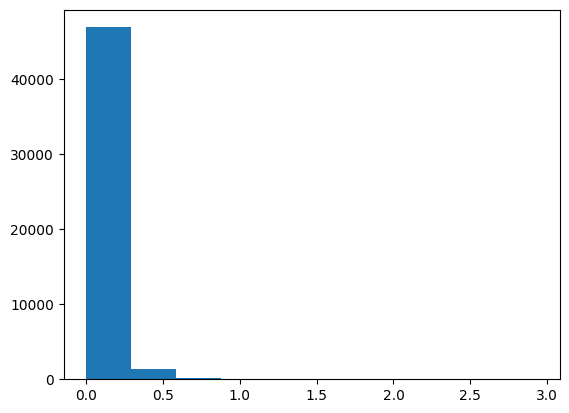

In [14]:
plt.hist(df[response_col])
plt.show()

In [15]:
# #divide into 4group
# group=[]
# for i in range(len(df)):
#     group.append(np.random.choice(4))
# df['group']=group

In [16]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,test_size=0.3, random_state=1104)
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
dnn_x_train = df_train[xvar]
dnn_p_train = df_train[pvar]
dnn_t_train = df_train[share_col]
dnn_y_train = df_train[response_col]

In [77]:
#dnn for y = theta(x)*z
def dnn_y(xvar,pvar):
    input1_ = Input(shape=(len(xvar),),name='feature_input')
    input2_ = Input(shape=(len(pvar),),name='policy_input')
    a = layers.Dense(32,activation='relu')(input1_)
    a = layers.Dense(4,activation='relu')(a)

    a1 = layers.Dense(1,name='parameter_a')(a)
    b = layers.Dense(1,name='parameter_b')(a)
    bt = layers.dot([b,input2_],axes=1)
    output_ = layers.add([a1,bt],name='output')
    # output_ = layers.Dense(1,use_bias = False,trainable=False,activation='sigmoid',
    #                kernel_initializer = tf.keras.initializers.constant(1),
    #                name='output')(abt)
    model = Model(inputs=[input1_,input2_],outputs=[output_])
    model.summary()
    return model

In [78]:
#dnn for t = theta(x)*z
def dnn_t(xvar,pvar):
    input1_ = Input(shape=(len(xvar),),name='feature_input')
    input2_ = Input(shape=(len(pvar),),name='policy_input')
    c = layers.Dense(32,activation='relu')(input1_)
    c = layers.Dense(4,activation='relu')(c)
    c1 = layers.Dense(1,name='parameter_c')(c)
    d = layers.Dense(1,name='parameter_d')(c)
    dt = layers.dot([d,input2_],axes=1)
    output_ = layers.add([c1,dt],name='output')
    model = Model(inputs=[input1_,input2_],outputs=[output_])
    model.summary()
    return model

In [79]:
#training
model_y = dnn_y(xvar,pvar)
# loss = tf.keras.losses.BinaryCross/entropy()
# opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
# cubic_dnn.compile(optimizer = opt,loss = loss,metrics=METRICS)
model_y.compile(optimizer = 'adam',loss = 'mse',metrics = ['mae'])
history_y = model_y.fit([dnn_x_train,dnn_p_train],dnn_y_train,epochs=100,batch_size = 128,validation_split=0.1)


Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 feature_input (InputLayer)  [(None, 58)]                 0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 32)                   1888      ['feature_input[0][0]']       
                                                                                                  
 dense_9 (Dense)             (None, 4)                    132       ['dense_8[0][0]']             
                                                                                                  
 parameter_b (Dense)         (None, 1)                    5         ['dense_9[0][0]']             
                                                                                           

In [80]:
model_t = dnn_t(xvar,pvar)
model_t.compile(optimizer = 'adam',loss = 'mse',metrics = ['mae'])
history_t = model_t.fit([dnn_x_train,dnn_p_train],dnn_t_train,epochs=200,batch_size = 32,validation_split=0.1)

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 feature_input (InputLayer)  [(None, 58)]                 0         []                            
                                                                                                  
 dense_10 (Dense)            (None, 32)                   1888      ['feature_input[0][0]']       
                                                                                                  
 dense_11 (Dense)            (None, 4)                    132       ['dense_10[0][0]']            
                                                                                                  
 parameter_d (Dense)         (None, 1)                    5         ['dense_11[0][0]']            
                                                                                           

In [81]:
#inference
modela = Model(model_y.input,model_y.get_layer('parameter_a').output)
modelb = Model(model_y.input,model_y.get_layer('parameter_b').output)
modelc = Model(model_t.input,model_t.get_layer('parameter_c').output)
modeld = Model(model_t.input,model_t.get_layer('parameter_d').output)


In [82]:
dnn_x_test = df_test[xvar]
dnn_p_test = df_test[pvar]

y_true = df_test[response_col]
t_true = df_test[share_col]

df_test['pred_y'] = model_y.predict([dnn_x_test,dnn_p_test]).reshape(-1)
df_test['pred_t'] = model_t.predict([dnn_x_test,dnn_p_test]).reshape(-1)
df_test['ydiff'] = y_true - df_test['pred_y']
df_test['tdiff'] = t_true - df_test['pred_t']

pred_b = modelb.predict([dnn_x_test,dnn_p_test]).reshape(-1)
pred_d = modelc.predict([dnn_x_test,dnn_p_test]).reshape(-1)



455/455 [==============================] - 1s 1ms/step


In [83]:
#calculate H(x) = b(x)/d(x)
H = pred_b/pred_d
df_test['original_est']=H

In [150]:
pred_d

array([2.2041507 , 2.422427  , 0.01400688, ..., 0.5047024 , 4.9448304 ,
       3.7012498 ], dtype=float32)

In [85]:
#calculate debiased term
##calculate H_theta
H_theta = np.vstack([np.zeros(len(df_test)),1/pred_d,np.zeros(len(df_test)),-pred_b/pred_d/pred_d]).T

In [86]:
df_test['ydiff_p'] = df_test['ydiff']*df_test['Z']
df_test['tdiff_p'] = df_test['tdiff']*df_test['Z']

In [87]:

#calculate l_theta
l_theta = -np.array(df_test[['ydiff','tdiff','ydiff_p','tdiff_p']])

In [106]:
#calculate lambdax
lambdax = np.zeros((len(df_test),4,4))
for i in range(len(df_test)):
    z = np.hstack([1,np.array(df_test['Z'])[i]])
    zz = np.outer(z,z)
    temp = np.zeros((4,4))
    xx = np.tensordot(np.eye(2),zz,axes=0)
    temp[:2,:2] = xx[0][0]
    temp[2:,2:] = xx[1][1]
    lambdax[i]=temp
cc2=np.zeros((len(df_test),4,4))
notinv=[]
for i in range(lambdax.shape[0]):
    try:
        cc2[i]=np.linalg.inv(lambdax[i]+0.1*np.eye(lambdax[0].shape[0]))
    except:
        notinv.append(i)
        cc2[i]=np.linalg.inv(lambdax[i]+0.05*np.eye(lambdax[0].shape[0]))
print('lambda inv done.')

lambda inv done.


In [107]:
len(notinv)

0

In [108]:
#debiased_term
tri_multi = []

for j in range(len(df_test)):
    tri_multi.append(np.dot(H_theta[j].reshape(1,4),np.dot(cc2[j],l_theta[j].reshape(4,1))))

In [109]:
cc2

array([[[ 5.23809524, -4.76190476,  0.        ,  0.        ],
        [-4.76190476,  5.23809524,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  5.23809524, -4.76190476],
        [ 0.        ,  0.        , -4.76190476,  5.23809524]],

       [[ 5.23809524, -4.76190476,  0.        ,  0.        ],
        [-4.76190476,  5.23809524,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  5.23809524, -4.76190476],
        [ 0.        ,  0.        , -4.76190476,  5.23809524]],

       [[ 0.90909091,  0.        ,  0.        ,  0.        ],
        [ 0.        , 10.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.90909091,  0.        ],
        [ 0.        ,  0.        ,  0.        , 10.        ]],

       ...,

       [[ 5.23809524, -4.76190476,  0.        ,  0.        ],
        [-4.76190476,  5.23809524,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  5.23809524, -4.76190476],
        [ 0.        ,  0.        , -4.76190476,  5.

In [110]:
df_test['debiased_term']=np.array(tri_multi).reshape(-1)

In [111]:
df_test['est'] = df_test['original_est']-df_test['debiased_term']

In [112]:
df_test

,ZIP,Date,crime_count,trip_count,Z,mean_pop,Avg_Male_Percentage,Avg_Asian_NonLatinx_Percentage,Avg_Black_NonLatinx_Percentage,Avg_White_NonLatinx_Percentage,...,log_share,pred_y,pred_t,ydiff,tdiff,original_est,ydiff_p,tdiff_p,debiased_term,est
0,60622,2016-10-29,0.000000,8.554288,1,0.260786,0.929443,-0.619248,-0.712331,0.986133,...,2.256990,0.023786,2.131297,-0.023786,0.125693,0.003589,-0.023786,0.125693,-0.348836,0.352424
1,60616,2016-09-24,0.000000,11.292422,1,0.266816,-0.324145,2.824204,-0.152299,-0.468497,...,2.508983,0.023786,2.400541,-0.023786,0.108442,0.003265,-0.023786,0.108442,-0.280326,0.283591
2,60619,2014-10-14,0.000000,0.000000,0,0.593712,-1.455867,-1.056221,2.096206,-1.464034,...,0.000000,0.026745,0.014007,-0.026745,-0.014007,0.649755,-0.000000,-0.000000,10.000000,-9.350245
3,60613,2014-04-22,0.000000,5.993530,0,0.180198,0.506635,-0.334119,-0.703477,1.290014,...,1.944985,0.015875,1.914881,-0.015875,0.030105,0.004131,-0.000000,0.000000,-0.157215,0.161346
4,60625,2016-09-07,0.000000,1.612421,0,1.288961,0.296999,0.197759,-0.747895,0.273195,...,0.960277,0.015875,0.870538,-0.015875,0.089739,0.009087,-0.000000,0.000000,-1.030848,1.039935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,60601,2014-01-04,0.000000,0.135421,0,-1.270164,-0.818776,1.258722,-0.733834,0.875608,...,0.127004,0.002047,0.516671,-0.002047,-0.389668,3.094632,-0.000000,-0.000000,7.541888,-4.447256
14548,60613,2015-07-01,0.000000,11.111381,0,0.180198,0.506635,-0.334119,-0.703477,1.290014,...,2.494146,0.015875,2.790660,-0.015875,-0.296515,0.002835,-0.000000,-0.000000,1.062525,-1.059690
14549,60660,2016-03-21,0.000000,0.359868,1,-0.094190,0.664824,0.319462,-0.448744,0.459419,...,0.307388,0.023786,0.585024,-0.023786,-0.277636,0.015673,-0.023786,-0.277636,2.615404,-2.599730
14550,60604,2014-04-10,0.000000,222.442900,0,-1.825180,-1.930754,0.840550,-0.626017,1.090428,...,5.409156,0.004649,4.944830,-0.004649,0.464325,0.262817,-0.000000,0.000000,-0.939012,1.201829


In [143]:
df_test['original_est'].mean(),df_test['original_est'].std()

(0.45313662, 3.3634384)

In [148]:
df_test['original_est'].mean()/(df_test['original_est'].std()/np.sqrt(len(df_test)))

16.25200819625367

In [144]:
df_test['est'].mean(),df_test['est'].std()

(-1.8681070538248823, 63.56667979647759)

In [147]:
df_test['est'].mean()/(df_test['est'].std()/np.sqrt(len(df_test)))

-3.545141509005664

In [162]:
winsordf = df_test.loc[(df_test['est']<10)&(df_test['est']>-9)]

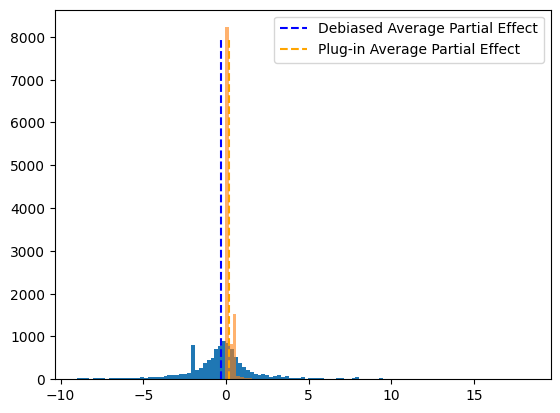

In [177]:
plt.hist(winsordf['est'],bins=80)
plt.hist(winsordf['original_est'],bins=80,alpha=0.6)
plt.vlines(x=winsordf['est'].mean(),ymin=0,ymax=8000,color='blue',ls='--',label='Debiased Average Partial Effect')
plt.vlines(x=winsordf['original_est'].mean(),ymin=0,ymax=8000,color='orange',ls='--',label='Plug-in Average Partial Effect')
plt.legend()
plt.show()

In [46]:
df_test1 = df_test.copy()

In [114]:
df_test['year'] = df_test['Date'].dt.year
df_test['month'] = df_test['Date'].dt.month
df_test['day'] = df_test['Date'].dt.day

In [115]:
estdf = df_test.groupby(['ZIP','year','month']).agg({'est':['mean','std','count']}).reset_index()
# estdf = df_test.groupby(['ZIP','year']).agg({'est':['mean','std','count']}).reset_index()
# estdf = df_test.groupby(['year','month']).agg({'est':['mean','std','count']}).reset_index()

In [116]:
estdf.columns = ['ZIP','year','month','mean','std','count']
# estdf.columns = ['ZIP','year','mean','std','count']
# estdf.columns = ['year','month','mean','std','count']

In [145]:
estdf['upper'] = estdf['mean']+1.96*estdf['std']/np.sqrt(estdf['count'])
estdf['lower'] = estdf['mean']-1.96*estdf['std']/np.sqrt(estdf['count'])

In [146]:
estdf

,ZIP,year,month,mean,std,count,upper,lower
0,60601,2014,1,-28.407553,70.785123,10,15.465521,-72.280627
1,60601,2014,2,-2.802799,2.718229,3,0.273166,-5.878765
2,60601,2014,3,-0.267353,1.426077,10,0.616538,-1.151245
3,60601,2014,4,0.430802,0.961416,9,1.058927,-0.197324
4,60601,2014,5,1.034698,1.025019,8,1.744999,0.324396
...,...,...,...,...,...,...,...,...
1596,60661,2016,10,-0.280294,1.592400,9,0.760074,-1.320662
1597,60661,2016,11,-1.002081,1.566883,10,-0.030916,-1.973245
1598,60661,2016,12,-0.446329,2.127067,10,0.872041,-1.764699
1599,60661,2017,1,-0.019567,1.608764,5,1.390577,-1.429710


In [182]:
no2017 = estdf.loc[estdf['year']!=2017]

In [183]:
no2017.describe()

,ZIP,year,mean,std,count,upper,lower
count,129.000000,129.00000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,60627.348837,2015.00000,-0.837485,11.084797,109.806202,-0.629260,-1.045710
std,18.572767,0.81968,15.816861,54.951185,9.123354,14.765149,16.876588
min,60601.000000,2014.00000,-176.891615,0.000000,86.000000,-164.691537,-189.091693
25%,60611.000000,2014.00000,-0.169731,0.397751,103.000000,-0.155263,-0.181590
50%,60623.000000,2015.00000,0.000516,0.997136,110.000000,0.026640,-0.008231
75%,60644.000000,2016.00000,0.798832,7.282247,116.000000,0.899602,0.698061
max,60661.000000,2016.00000,11.060908,585.105776,136.000000,11.499163,10.622652


In [119]:
from matplotlib.pyplot import figure

In [120]:
estdf['ZIP'].unique()

array([60601, 60602, 60603, 60604, 60605, 60606, 60607, 60608, 60609,
       60610, 60611, 60612, 60613, 60614, 60615, 60616, 60617, 60618,
       60619, 60621, 60622, 60623, 60624, 60625, 60626, 60630, 60636,
       60637, 60639, 60640, 60641, 60642, 60644, 60645, 60647, 60649,
       60651, 60653, 60654, 60657, 60659, 60660, 60661])

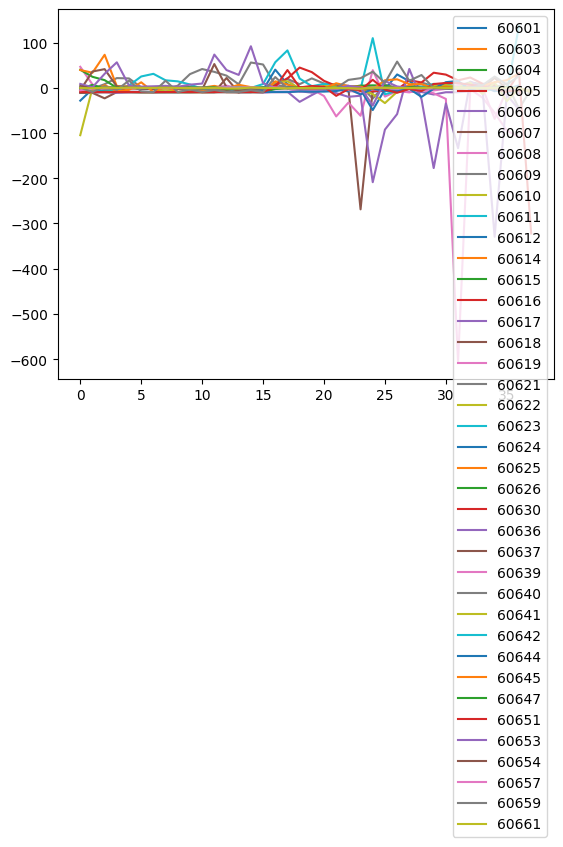

In [121]:
for zip in [60601, 60603, 60604, 60605, 60606, 60607, 60608, 60609,
       60610, 60611, 60612, 60614, 60615, 60616, 60617, 60618,
       60619, 60621, 60622, 60623, 60624, 60625, 60626, 60630, 60636,
       60637, 60639, 60640, 60641, 60642, 60644, 60645, 60647,
       60651, 60653, 60654, 60657, 60659, 60661]:
    tempdf = estdf.loc[estdf['ZIP']==zip]
    plt.plot(np.array(tempdf['mean']),label=f'{zip}')
plt.legend()
plt.show()

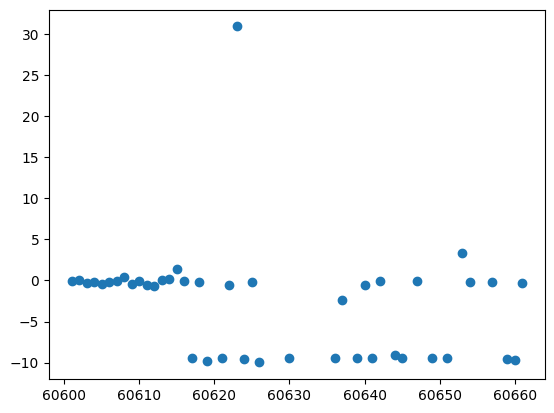

In [122]:
tempdf = estdf.loc[(estdf['year']==2014)&(estdf['month']==7)]
plt.scatter(tempdf['ZIP'],tempdf['mean'])
plt.show()

In [178]:
poor=[
60621,
60624,
60604,
60637,
60636,
60653,
60644,
60612,
60623]
top5poor = [
60653,
60644,
60612,
60623]
rich=[60602,60655,60601,60631,60646,60654,60661,60638,60657]
top5rich = [60602,60601,60631,60646]

In [179]:
zip=60653
tempdf = estdf.loc[estdf['ZIP']==zip]

In [180]:
tempdf

,ZIP,year,month,mean,std,count,upper,lower
1377,60653,2014,1,8.606957,27.492979,8,27.658619,-10.444706
1378,60653,2014,2,1.125203,12.194158,4,13.075478,-10.825071
1379,60653,2014,3,30.993306,43.155015,11,56.496290,5.490322
1380,60653,2014,4,56.385370,57.219168,11,90.199737,22.571002
1381,60653,2014,5,4.977435,3.909487,6,8.105676,1.849194
1382,60653,2014,6,2.590056,7.536582,9,7.513957,-2.333844
1383,60653,2014,7,3.349683,6.389966,8,7.777704,-1.078338
1384,60653,2014,8,4.317434,2.317173,11,5.686795,2.948072
1385,60653,2014,9,2.312039,5.719359,14,5.308023,-0.683945
1386,60653,2014,10,6.968657,7.941813,8,12.472052,1.465261


In [181]:
datalist = ['2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
            '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
            '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
            '2017-01']

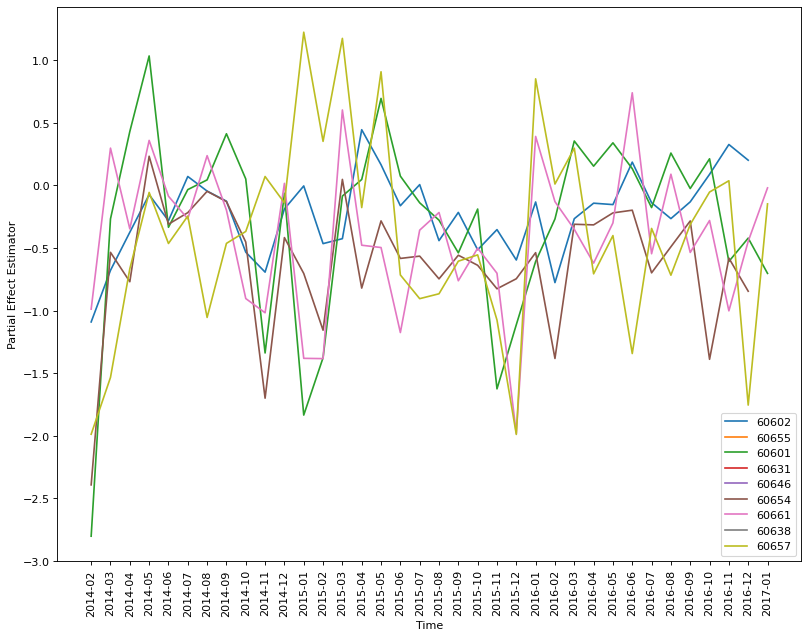

In [191]:
figure(figsize=(12, 9), dpi=80)
for zip in rich:
    tempdf = estdf.loc[estdf['ZIP']==zip]
    plt.plot(np.array(tempdf['mean'][1:-1]),label=f'{zip}')
plt.xticks(np.arange(len(tempdf)-2),datalist[1:],rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Partial Effect Estimator')
plt.legend()
plt.show()

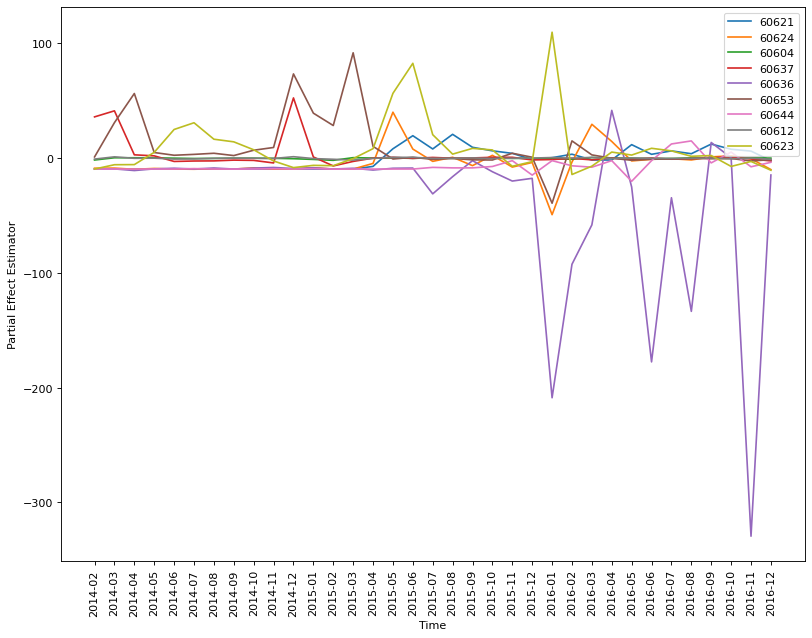

In [192]:
figure(figsize=(12, 9), dpi=80)
for zip in poor:
    tempdf = estdf.loc[estdf['ZIP']==zip]
    plt.plot(np.array(tempdf['mean'][1:-1]),label=f'{zip}')
plt.xticks(np.arange(len(tempdf)-2),datalist[1:-1],rotation='vertical')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Partial Effect Estimator')
plt.show()

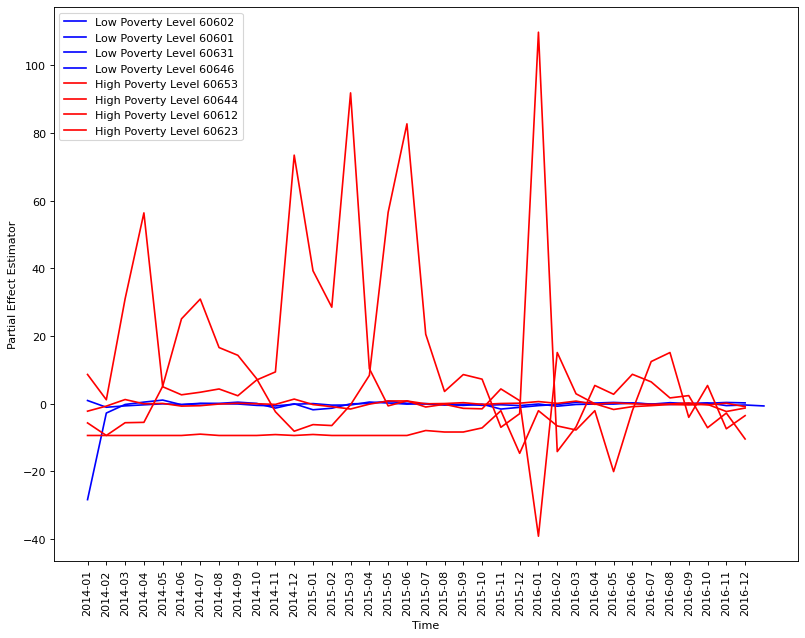

In [193]:


figure(figsize=(12, 9), dpi=80)
for zip in top5rich+top5poor:
    if zip in top5poor:
        tempdf = estdf.loc[estdf['ZIP']==zip]
        plt.plot(np.array(tempdf['mean'][:-1]),label=f'High Poverty Level {zip}',color='red')
    else:
        tempdf = estdf.loc[estdf['ZIP']==zip]
        plt.plot(np.array(tempdf['mean'][:-1]),label=f'Low Poverty Level {zip}',color='blue')
plt.xticks(np.arange(36),datalist[:-1],rotation='vertical')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Partial Effect Estimator')
plt.show()